In [4]:
#Importing the dependencies

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("creditcard.csv")

In [8]:
#1st 5 rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#last 5 rows
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
#unbalanced dataset
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [66]:
grouped = data.groupby(data.Class)
Legit_data=grouped.get_group(0)

In [67]:
Legit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

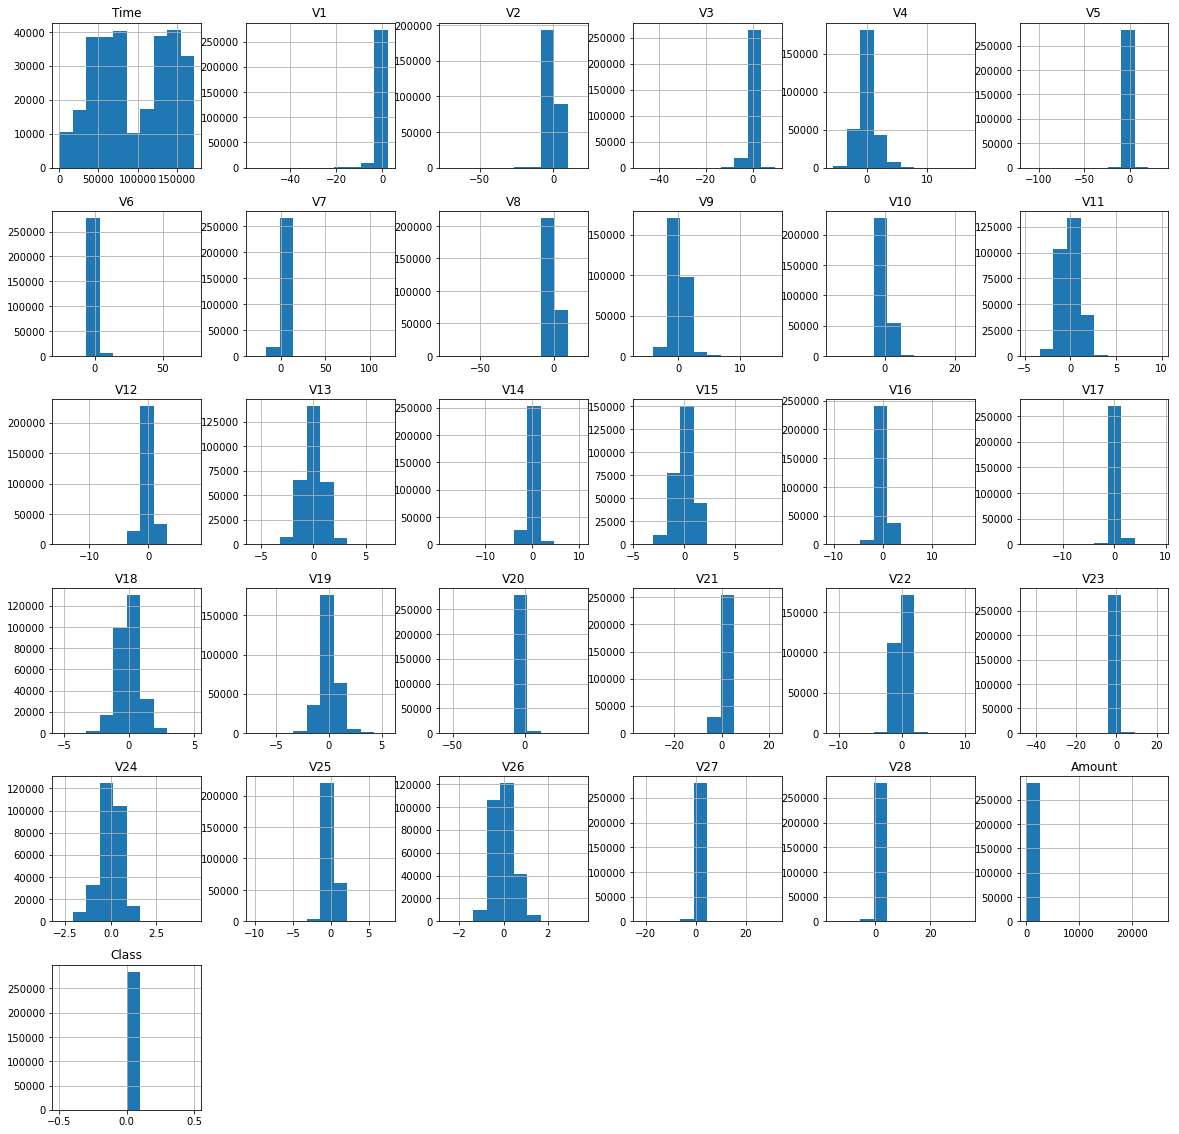

In [70]:
Legit_data.hist(figsize=(20,20))

In [11]:
#missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
#Class distribution leged transaction and fraudlent transactions
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#More than 99% is leged, unbalanced data, machine cannot predict fraudlent transactions
#Analysis of dataset
#0-Noramal
#1-Fraudalent

In [13]:
#Separating data for analysis
legit=data[data.Class==0] #pandas series datatype
fraud=data[data.Class==1]

In [14]:
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [17]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [18]:
#statistical measures about data Amount column
legit.Amount.describe() #describe will give statiscal measure we need

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
#Compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#Dealing with unbalanced data
#Under Sampling
#Build sample dataset with similar distribution of legit transactions and fraud transactions

#fraud: 492

#In the legit dataset take randomly 492 datapoints and join it with fraud dataset.

#In this case we have transformed datset to balanced form bcoz legit: 492 + fraud: 492 (Even distribution)


In [21]:
legit_sam=legit.sample(n=492) #random sampling



In [23]:
#concatinating 2 dataframes
new_ds=pd.concat([legit_sam,fraud],axis=0) #axis=0 all values are added row wise,else axis=1 values added columnwise
new_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
87268,61607.0,-0.523557,0.419637,0.521676,-2.205197,1.021148,0.411423,1.051972,0.214867,0.320478,...,-0.063195,-0.073153,0.316542,-0.993255,-0.829123,-1.194567,0.246902,0.180463,51.93,0
234370,147948.0,-0.521694,1.024112,-0.729476,-0.445454,0.717162,-0.813620,0.594624,0.206253,-0.135294,...,0.406939,1.308995,0.149611,0.641552,-0.700455,-0.245720,0.277617,0.240135,1.29,0
266545,162376.0,-0.356300,-0.302874,-0.526599,-3.019384,0.226207,-0.049534,-0.416539,0.394416,-2.779061,...,0.205422,0.730543,-0.316261,-0.336851,-0.057572,0.007050,0.026357,0.052084,10.00,0
245863,152942.0,1.844616,-0.648267,-0.896519,0.131389,-0.126481,0.095228,-0.288323,-0.058488,0.897660,...,-0.235998,-0.824852,0.271560,0.052512,-0.537072,0.227005,-0.060539,-0.021696,124.00,0
245254,152667.0,2.135892,-0.005393,-1.479272,0.162633,0.452568,-0.594968,0.231230,-0.325822,0.459938,...,-0.345894,-0.807960,0.199446,-0.976029,-0.125582,0.256993,-0.065533,-0.068279,1.98,0


In [24]:
new_ds.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [25]:
new_ds['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [26]:
new_ds.groupby('Class').mean()
#mean is similar in new and old dataset,nature of dataset not changed
#so dataset we have got good sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95266.449187,-0.058192,-0.051196,-0.048264,-0.033756,0.055780,-0.123935,0.064245,0.022959,0.024981,...,-0.015050,0.007299,0.012058,0.064882,-0.005606,-0.002646,0.003153,0.016147,0.001875,89.127703
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
#Split dataset into features(all other columns) and target
X = new_ds.drop(columns='Class',axis=1)
Y = new_ds['Class']

In [28]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
87268,61607.0,-0.523557,0.419637,0.521676,-2.205197,1.021148,0.411423,1.051972,0.214867,0.320478,...,-0.183362,-0.063195,-0.073153,0.316542,-0.993255,-0.829123,-1.194567,0.246902,0.180463,51.93
234370,147948.0,-0.521694,1.024112,-0.729476,-0.445454,0.717162,-0.813620,0.594624,0.206253,-0.135294,...,-0.140952,0.406939,1.308995,0.149611,0.641552,-0.700455,-0.245720,0.277617,0.240135,1.29
266545,162376.0,-0.356300,-0.302874,-0.526599,-3.019384,0.226207,-0.049534,-0.416539,0.394416,-2.779061,...,-0.358656,0.205422,0.730543,-0.316261,-0.336851,-0.057572,0.007050,0.026357,0.052084,10.00
245863,152942.0,1.844616,-0.648267,-0.896519,0.131389,-0.126481,0.095228,-0.288323,-0.058488,0.897660,...,0.163846,-0.235998,-0.824852,0.271560,0.052512,-0.537072,0.227005,-0.060539,-0.021696,124.00
245254,152667.0,2.135892,-0.005393,-1.479272,0.162633,0.452568,-0.594968,0.231230,-0.325822,0.459938,...,-0.125689,-0.345894,-0.807960,0.199446,-0.976029,-0.125582,0.256993,-0.065533,-0.068279,1.98


In [29]:
Y.head()

87268     0
234370    0
266545    0
245863    0
245254    0
Name: Class, dtype: int64

In [35]:
#Split this data as training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
#We are creating 4 arrays, 80%  of features stored in X_train its corressponding label is stored in y_tarin
#similarly 20% of data is testing data
#stratify data based on y: it means even distribution of target labels in both test and train array
#random_state=2 way how data splits

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [38]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,-0.032500,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,549.06
55311,46875.0,-11.965145,-15.282636,1.250076,5.904400,15.275762,-10.886820,-11.318751,0.405355,1.656217,...,-2.263775,-0.475574,0.076824,-1.950280,0.875662,-1.634387,-0.151792,2.314836,-0.391639,1.50
38043,39224.0,1.241649,-0.006215,-0.041188,0.760656,0.221046,0.597906,-0.308416,0.197737,0.198273,...,-0.078706,0.110470,0.243068,-0.361411,-1.401433,0.776222,-0.131580,0.017330,0.002189,30.84
81348,58899.0,1.025652,-0.306601,2.023160,1.748178,-1.359049,0.651689,-1.024654,0.356005,1.562120,...,-0.157623,0.004514,0.629362,-0.011825,0.679913,0.459834,-0.246746,0.136133,0.041940,3.08
81190,58824.0,-7.277992,4.641130,-1.891091,-2.271261,-1.970527,-0.753155,-0.736258,1.693957,3.192361,...,1.671725,-0.682792,-0.203810,0.336190,0.011039,0.474675,0.611468,0.032233,-1.136778,0.77


In [39]:
#train our model Logistic regression model for binary classification pblm
model = LogisticRegression()

In [49]:
#training model with training data
model.fit(X_train,Y_train)#fit data to logistic model and make some predictions


LogisticRegression()

In [50]:
#Evaluation of model,Based on accuracy_score
#accuracy_score with training data, lets give xtrain and try to find ytrain and see whether its giving same value as original
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred,Y_train)
print("accuracy on training data:",training_data_accuracy)

accuracy on training data: 0.9377382465057179


In [ ]:
#Above out of 100 --- 93 is correct

In [63]:
#accuracy_score with testing data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred,Y_test)
print("accuracy on testing data:",test_data_accuracy)
mean_absolute_error(Y_test,X_test_pred)

accuracy on testing data: 0.8984771573604061


0.10152284263959391

In [ ]:
#Why accuracy score of training data?
#if accuracy score of train and test are  different in large range
#That means that are model is overfitted or underfitted with training data, does'nt get generalized learning
#underfit: train accuracy is low and test accuracy is high --> highly 